<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

In [2]:
df = pd.read_csv('../Data/breast-cancer-wisconsin-data.csv')

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [5]:
from sklearn.linear_model import LogisticRegression

y = df['diagnosis']
X = df.drop(labels = ['id','diagnosis','Unnamed: 32'], axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter = 300)
logreg.fit(X_train,y_train)

from sklearn import metrics

predictions = logreg.predict(X_test)
print('Accuracy score:',metrics.accuracy_score(y_test, predictions))


Accuracy score: 0.956140350877193


D:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
#Confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[70  1]
 [ 4 39]]


### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn import svm

print('Training data shape:',X_train.shape)
print('Training data labels:',y_train.shape)

#Create Support Vector Classifier (default rbf kernel):

classifier = svm.SVC()

#Fit data:

classifier.fit(X_train,y_train)
 
#Predictions:
svm_predictions = classifier.predict(X_test)

#Metrics:

print('Accuracy score:',metrics.accuracy_score(y_test,svm_predictions))

#Confusion matrix
print('Confusion matrix:','\n',metrics.confusion_matrix(y_test,svm_predictions))

#Classification report
print('Classification report:','\n',metrics.classification_report(y_test,svm_predictions))

Training data shape: (455, 30)
Training data labels: (455,)
Accuracy score: 0.9473684210526315
Confusion matrix: 
 [[71  0]
 [ 6 37]]
Classification report: 
               precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
#Trying accuracy scores for different kernels

print('Accuracy score for rbf kernel:',svm.SVC(kernel = 'rbf').fit(X_train,y_train).score(X_test,y_test))
print('Accuracy score for linear kernel:',svm.SVC(kernel = 'linear').fit(X_train,y_train).score(X_test,y_test))
print('Accuracy score for polynomial kernel:',svm.SVC(kernel = 'poly').fit(X_train,y_train).score(X_test,y_test))
print('Accuracy score for sigmoid kernel:',svm.SVC(kernel = 'sigmoid').fit(X_train,y_train).score(X_test,y_test))

Accuracy score for rbf kernel: 0.9473684210526315
Accuracy score for linear kernel: 0.956140350877193
Accuracy score for polynomial kernel: 0.9473684210526315
Accuracy score for sigmoid kernel: 0.4649122807017544


### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [113]:
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

NB_classifier = naive_bayes.GaussianNB()
NB_classifier.fit(X_train,y_train)

NB_predictions = NB_classifier.predict(X_test)

print('Accuracy score:', accuracy_score(y_test,NB_predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test,NB_predictions))
print('Classification report:')
print(classification_report(y_test,NB_predictions))

Accuracy score: 0.9736842105263158
Confusion matrix:
[[71  0]
 [ 3 40]]
Classification report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

In [39]:
#Gridsearch for Logistic Regression model

from sklearn.model_selection import GridSearchCV

logmodel = LogisticRegression()


log_params = {'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
              'C': np.arange(10)
             }


             
#What is clf?

clf_logmodel = GridSearchCV(logmodel,log_params)
clf_logmodel.fit(X_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
#Gridsearch for Support Vector Machine model

SVM = svm.SVC()
svm_params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'C': np.arange(3),
              'degree' : [3,4,5]
             }
clf_svm = GridSearchCV(SVM,svm_params)
clf_svm.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0, 1, 2]), 'degree': [3, 4, 5],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
clf_logmodel_predictions = clf_logmodel.predict(X_test)
clf_svm_predictions = clf_svm.predict(X_test)


print('Accuracy for SVM using GridSearchCV:', accuracy_score(y_test,clf_svm_predictions))
print('Accuracy for SVM w/o using CV:',
      accuracy_score(y_test,svm.SVC().fit(X_train,y_train).predict(X_test)))
print('\n')

print('Accuracy for Logistic Regression using GridSearchCV:', accuracy_score(y_test,clf_logmodel_predictions))
print('Accuracy for Logistic Regression w/o using CV:',
      accuracy_score(y_test,LogisticRegression().fit(X_train,y_train).predict(X_test)))

Accuracy for SVM using GridSearchCV: 0.956140350877193
Accuracy for SVM w/o using CV: 0.9473684210526315


Accuracy for Logistic Regression using GridSearchCV: 0.9649122807017544
Accuracy for Logistic Regression w/o using CV: 0.956140350877193


#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [ ]:
#Done above
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [ ]:
#Done above
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [ ]:
roc_curve(y_test,)

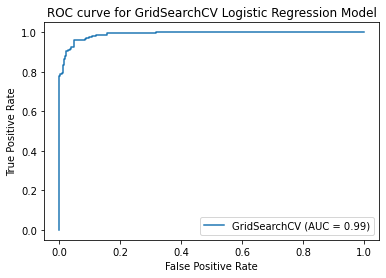

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

#Plot curve for Logistic Regression Model

plot_roc_curve(clf_logmodel,X_train,y_train)


plt.title('ROC curve for GridSearchCV Logistic Regression Model')

plt.show()

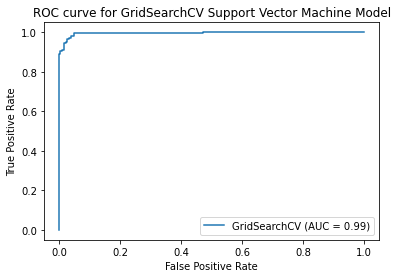

In [101]:
#Plot curve for Support Vector Machine


plot_roc_curve(clf_svm,X_train,y_train)

plt.title('ROC curve for GridSearchCV Support Vector Machine Model')

plt.show()

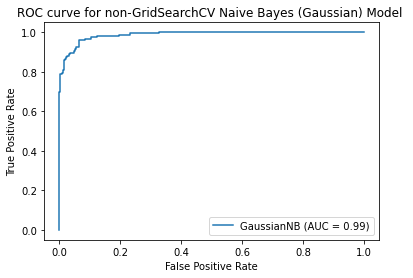

In [114]:
NB_classifier = naive_bayes.GaussianNB()
NB_classifier.fit(X_train,y_train)

plot_roc_curve(NB_classifier,X_train,y_train)

plt.title('ROC curve for non-GridSearchCV Naive Bayes (Gaussian) Model ')

plt.show()

No handles with labels found to put in legend.


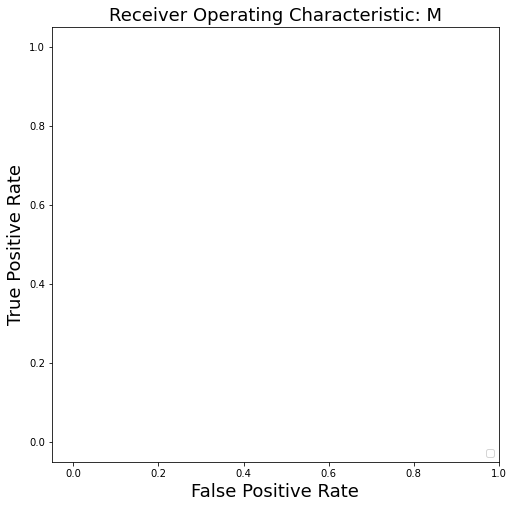

In [95]:
plt.figure(figsize=[8,8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [106]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,valid_scores = learning_curve(clf_logmodel,
                                                       X_train,
                                                       y_train,
                                                       train_sizes = [0.1,0.2,0.3,0.4,0.5])



array([ 36,  72, 109, 145, 182])

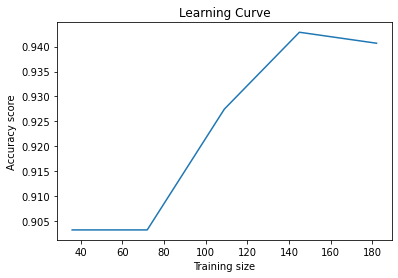

In [129]:
def plot_learning_curve(estimator, X, y, trainingsizes):
    
    train_sizes,train_scores,valid_scores = learning_curve(estimator,
                                                       X,
                                                       y,
                                                       train_sizes = trainingsizes)

    avg_scores = np.array([e.mean() for e in valid_scores])
    sns.lineplot(x = train_sizes,
                 y = avg_scores)

    plt.title('Learning Curve')
    plt.ylabel('Accuracy score')
    plt.xlabel('Training size')
    plt.show()


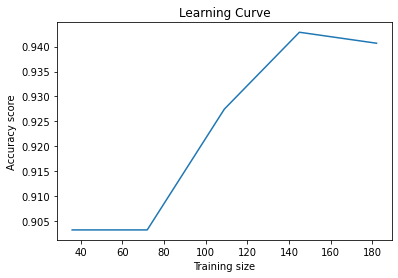

In [130]:
#Learning curve for Logistic Regression (GridSearched)
plot_learning_curve(clf_logmodel,X_train,y_train,[0.1,0.2,0.3,0.4,0.5])

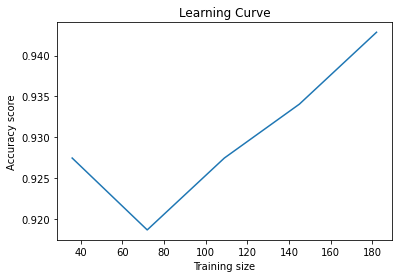

In [131]:
#Learning curve for SVM (GridSearched)
plot_learning_curve(clf_svm,X_train,y_train,[0.1,0.2,0.3,0.4,0.5])

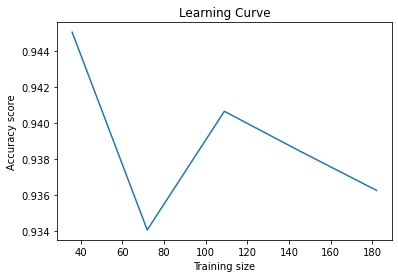

In [132]:
#Learning curve for Gaussian Naive Bayes (Not GridSearched)
plot_learning_curve(NB_classifier,X_train,y_train,[0.1,0.2,0.3,0.4,0.5])

## Whats up with the strange curves for each model??

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



